<font size="5">**线性代数：机器学习背后的优化原理**</font><br/><br/>
**<font size="3">1、标量，向量，矩阵，张量</font>**<br/>
1.1.1计算并绘制2v-w的结果

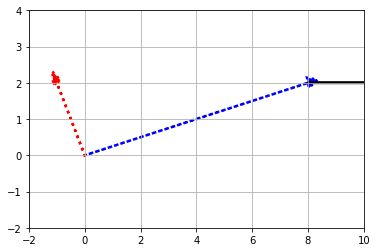

In [5]:
#导入numpy包
import numpy as np
v=np.array([4,1])
w=np.array([-1,2])
two_v=2*v
n=two_v-w
#导入绘图包
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.axes()
ax.arrow(0,0,*two_v,color="b",linestyle="dotted",linewidth=2.5,head_width=0.30,head_length=0.35)
ax.arrow(0,0,*w,color="r",linestyle="dotted",linewidth=2.5,head_width=0.3,head_length=0.35)
ax.arrow(two_v[0],two_v[1],*n,linewidth=2.5,head_width=0.30,head_length=0.35)#老师您好，三个点的位置都挨个换过了，还不及目前看到的效果，是不是三个点的定义错了？老师，我这等学渣，您还是直接告诉我吧，掘地三尺也摸索不出来，
plt.xlim(-2,10)
plt.ylim(-2,4)
plt.grid()
plt.show()

**1.1.2绘制方程组，说明是否有解是否为唯一解，若有解需计算出方程组的解 **<br/>
y=2x+1<br/>
y=0.1x+6

In [6]:
#导入工科数学包
from sympy import *
#定义未知数X
x=Symbol("x")
#定义未知数y
y=Symbol("y")
#打印方程组求解的结果
print(solve([y-2*x-1,y-(1/10)*x-6],[x,y]))

{x: 2.63157894736842, y: 6.26315789473684}


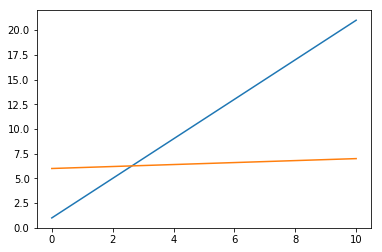

In [10]:
#方程组可视化
#囧，老师，我太愚钝了，您说的方法我不知该怎么补全
x_1=np.linspace(0,10,100)
y_1=2*x_1+1
plt.plot(x_1,y_1)
x_2=np.linspace(0,10,100)
y_2=0.1*x_2+6
plt.plot(x_2,y_2)
plt.show()

**1.2.1使用numpy（或自写算法）说明(AB)^T=B^T*A^T **

In [34]:
#定义A矩阵
A=[[21,7],
   [15,42],
   [9,6]]
#定义B矩阵
B=[[4],
   [33]]

In [35]:
#AB矩阵相乘
mul_AB=np.matmul(A,B)
#将相乘后的AB矩阵结果转置并打印出来
tran_mulAB=np.transpose(mul_AB)
print(tran_mulAB)

[[ 315 1446  234]]


In [36]:
#将A矩阵进行转置
tran_A=np.transpose(A)
#将B矩阵进行转置
tran_B=np.transpose(B)
#将转置后的B矩阵与转置后的A矩阵相乘，并打印出来
tranA_tranB=np.matmul(tran_B,tran_A)
print(tranA_tranB)

[[ 315 1446  234]]


**1.2.2使用numpy（或自写算法）说明A(B+C)=AB+AC<br/>**

In [44]:
#定义A矩阵
A=np.array([[9,3],
   [8,4],
   [7,6]])
#定义B矩阵
B=np.array([[5],
   [2]])
#定义C矩阵
C=np.array([[5],
   [7]])
#计算B+C结果赋值给D
D=B+C
#计算A乘D的结果赋值给E
mulAD=np.matmul(A,D)
print(mulAD)

[[117]
 [116]
 [124]]


In [45]:
#计算AB结果
mul_AB=np.matmul(A,B)
#计算AC结果
mul_AC=np.matmul(A,C)
#计算AB+AC的结果
sum_AB_AC=mul_AB+mul_AC
print(sum_AB_AC)

[[117]
 [116]
 [124]]


**2.1、证明题 通过LaTeX公式，结合概念，假设存在的情况下，证明的解 Ax=b的解x=A^(-1)b**

In [69]:
#定义一个矩阵A两行两列
A=np.array([[1,2],[3,4]])
x=2
b=A*x
print(b)
print(x)

[[2 4]
 [6 8]]
2


In [75]:
#计算矩阵的逆
invA=np.linalg.inv(A)
x=np.matmul(invA,b)
print(x)

[[2.0000000e+00 8.8817842e-16]
 [0.0000000e+00 2.0000000e+00]]


**2.2.1通过numpy计算，再次验证2.1证明题  并用LaTeX公式写出A^(-1)是多少（小数分数皆可）<br/>**
y=2x+1<br/>
y=0.1x+6

In [64]:
#将方程改写成矩阵相乘的形式
A=np.array([[2,-1],[0.1,-1]])
#计算A的逆
invA=np.linalg.inv(A)
print(invA)

[[ 0.52631579 -0.52631579]
 [ 0.05263158 -1.05263158]]


**2.2.2**<br/>
**1**、请用numpy（或自写算法）实现一个6x6的对角矩阵，矩阵的对角线由3至8（含8）组成。<br/>
**2**、计算第一问生成的对角矩阵与向量的乘积

In [19]:
#定义一个6行6列的对角矩阵,矩阵的对角线由3至8（含8）组成
M=np.array([[np.random.randint(3,9) if i==j else 0 for i in range(6)] for j in range(6)])
M

array([[4, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 4]])

In [31]:
#定义一个向量N [6,7,1,2,5,9]^T
N=np.array([[6,7,1,2,5,9]])
tran_N=np.transpose(N)
print(N)
print(tran_N)

#计算M*N^T的值，赋值给M_tran_N
M_tran_N=np.matmul(M,tran_N)
M_tran_N

[[6 7 1 2 5 9]]
[[6]
 [7]
 [1]
 [2]
 [5]
 [9]]


array([[24],
       [56],
       [ 5],
       [14],
       [20],
       [36]])

**3**<br/>
使用numpy验证迹运算返回的是矩阵对角元素的和Tr(ABC)=Tr(CAB)=Tr(BCA)

In [55]:
#定义A,B,C三个矩阵
A=np.array([[7,6],[29,3]])
B=np.array([[5,6],[8,9]])
C=np.array([[2,17],[1,5]])
#分别计算ABC，CAB，BCA的迹
AB=np.matmul(A,B)
ABC=np.matmul(AB,C)
CA=np.matmul(C,A)
CAB=np.matmul(CA,B)
BC=np.matmul(B,C)
BCA=np.matmul(BC,A)
print(ABC)
print(CAB)
print(BCA)
trac_ABC=np.trace(ABC)
trac_CAB=np.trace(CAB)
trac_BCA=np.trace(BCA)
print(trac_ABC)
print(trac_CAB)
print(trac_BCA)

[[ 262 1891]
 [ 539 3878]]
[[3039 3609]
 [ 928 1101]]
[[3447  441]
 [5424  693]]
4140
4140
4140


**4.1、计算向量的范数**<br/>
编写一个函数来计算一下向量的各种范数。

In [12]:
# TODO 实现这里向量范数计算的函数，要求可以计算p = 0,1,2,3 ... 无穷 情况下的范数

""" 计算向量的范数
    参数
        x: 向量 numpy数组 或者list数组
        p: 范数的阶，int型整数或者None
        infty: 是否计算max范数，bool型变量，True的时候表示计算max范数，False的时候计算p范数
        
    返回
        向量的范数，float类型数值
        
    hint:
        1.你需要首先判断infty是True or False, 然后判断p 是否为零
        2.注意int类型变量在计算时候需要规整为float类型
    
"""
x=np.array([[1,2],[3,4]])
def calc_Norm(x, p = 2, infty = False):
    pass

In [13]:
%run -i -e test.py LinearRegressionTestCase.test_calc_Norm

ERROR:root:File `'test.py'` not found.


**4.2、计算矩阵的范数**

In [77]:
# TODO 实现这里矩阵Frobenius范数计算的函数

""" 计算向量的范数
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式
        
    返回
        矩阵的Frobenius范数，float类型数值
    
"""
def calc_Frobenius_Norm(A):
    pass

In [78]:
%run -i -e test.py LinearRegressionTestCase.test_calc_Frobenius_Norm

ERROR:root:File `'test.py'` not found.


**4.3、计算矩阵的条件数**

In [ ]:
""" 计算矩阵的条件数
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式
        
    返回
        矩阵的condition number,
    
"""
def calc_Condition_Number(A):
    pass

In [ ]:
%run -i -e test.py LinearRegressionTestCase.test_calc_Condition_Number